In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
import warnings 
warnings.filterwarnings('ignore')

# Data Import

In [4]:
df = pd.read_csv('Processed_Flipdata - Processed_Flipdata.csv')

Here i import the dataset.

In [6]:
df

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


# Data Cleaning

In [8]:
df.head(10)

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
5,5,Infinix HOT 30i,Glacier Blue,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
6,6,Infinix HOT 30i,Mirror Black,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
7,7,Infinix HOT 30i,Diamond White,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
8,8,Infinix HOT 30i,Diamond White,64,4,5000,50MP,5MP,1,16.76,G37,"7,999"
9,9,Infinix HOT 30i,Mirror Black,64,4,5000,50MP,5MP,1,16.76,G37,"7,999"


In [9]:
df.tail(10)

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
531,628,OPPO F21s Pro,Starlight Black,128,8,4500,64MP,16MP,0,16.33,Qualcomm SM6225 Snapdragon 680 4G (6 nm),"20,890"
532,631,APPLE iPhone 12,Blue,64,8,2815,12MP,12MP,0,15.49,ios,"53,999"
533,632,SAMSUNG Galaxy A13,Peach,128,6,5000,50MP,8MP,0,16.76,Exynos Octa Core,"16,499"
534,633,Nokia G11 Plus,Grey,64,4,5000,50MP,8MP,0,16.55,Octa Core,"9,790"
535,636,SAMSUNG Galaxy A04e,Light Blue,64,3,5000,13MP,5MP,0,16.51,Mediatek Helio P35,"9,999"
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"
540,642,OPPO A77,Sky Blue,128,4,5000,50MP,8MP,0,16.66,Mediatek Helio G35,"15,999"


In [10]:
df.describe()

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,289.711645,110.550832,5.397412,4871.587800,0.062847,16.431201
std,182.359185,60.600694,1.984923,780.148862,0.242911,2.523553
min,0.000000,16.000000,2.000000,800.000000,0.000000,4.500000
25%,135.000000,64.000000,4.000000,5000.000000,0.000000,16.510000
50%,273.000000,128.000000,6.000000,5000.000000,0.000000,16.710000
75%,434.000000,128.000000,8.000000,5000.000000,0.000000,16.940000
max,642.000000,256.000000,8.000000,7000.000000,1.000000,41.940000


In [11]:
df.isnull().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [12]:
df.drop(columns=["Unnamed: 0"], inplace=True)

I drop the unnamed column as it has no use.

In [14]:
df

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          541 non-null    object 
 1   Colour         541 non-null    object 
 2   Memory         541 non-null    int64  
 3   RAM            541 non-null    int64  
 4   Battery_       541 non-null    int64  
 5   Rear Camera    541 non-null    object 
 6   Front Camera   541 non-null    object 
 7   AI Lens        541 non-null    int64  
 8   Mobile Height  541 non-null    float64
 9   Processor_     541 non-null    object 
 10  Prize          541 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 46.6+ KB


Here i see that prize should be in integer so i convert prize from object to int.

In [17]:
df["Prize"] = df["Prize"].astype(str).str.replace(",", "").astype(int)
df['Mobile Height'] = pd.to_numeric(df['Mobile Height'], errors='coerce') 
df['Battery_'] = pd.to_numeric(df['Battery_'], errors='coerce')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          541 non-null    object 
 1   Colour         541 non-null    object 
 2   Memory         541 non-null    int64  
 3   RAM            541 non-null    int64  
 4   Battery_       541 non-null    int64  
 5   Rear Camera    541 non-null    object 
 6   Front Camera   541 non-null    object 
 7   AI Lens        541 non-null    int64  
 8   Mobile Height  541 non-null    float64
 9   Processor_     541 non-null    object 
 10  Prize          541 non-null    int32  
dtypes: float64(1), int32(1), int64(4), object(5)
memory usage: 44.5+ KB


Now i again check for info.

# Rename & Convert Categorical columns to numeric

In [21]:
df.rename(columns={"Rear Camera": "Rear_Cam_MP", "Front Camera": "Front_Cam_MP","Prize":"Price","Battery_":"Battery"}, inplace=True)

In [22]:
if df["Rear_Cam_MP"].dtype == "object":
    df["Rear_Cam_MP"] = df["Rear_Cam_MP"].str.replace("MP", "").astype(float)
    df["Front_Cam_MP"] = df["Front_Cam_MP"].str.replace("MP", "").astype(float)
    df["Mobile Height"] = df["Mobile Height"].astype(int)

Now i rename some columns & change their data type.

In [24]:
df

,Model,Colour,Memory,RAM,Battery,Rear_Cam_MP,Front_Cam_MP,AI Lens,Mobile Height,Processor_,Price
0,Infinix SMART 7,Night Black,64,4,6000,13.0,5.0,1,16,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13.0,5.0,1,16,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50.0,16.0,0,16,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8.0,5.0,0,16,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50.0,5.0,1,16,G37,8999
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50.0,12.0,0,15,Qualcomm Snapdragon 8 Gen 2,79999
537,LAVA Z21,Cyan,32,2,3100,5.0,2.0,0,12,Octa Core,5998
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50.0,8.0,0,16,MediaTek Helio G35,9990
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50.0,32.0,0,16,"Exynos 1380, Octa Core",38999


# Outliers Detection & Removal

In [26]:
numeric_cols = ["Memory", "RAM", "Battery", "Rear_Cam_MP", "Front_Cam_MP", "Mobile Height", "Price"]

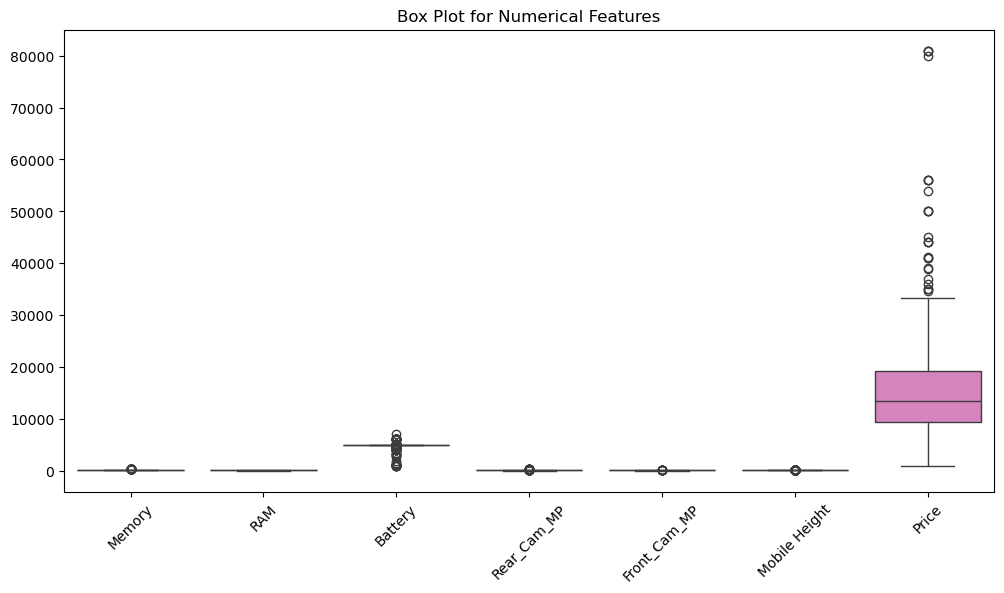

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.title("Box Plot for Numerical Features")
plt.show()

Now i plot for box plot to check the outliers.

In [29]:
# Function to cap outliers instead of removing them
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Capping outliers
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    
    return df

# Apply capping to all numerical columns
numerical_columns = ["Memory", "RAM", "Battery", "Rear_Cam_MP", "Front_Cam_MP", "Mobile Height", "Price"]
for col in numerical_columns:
    df = cap_outliers(df, col)

Here i remove the outliers in loop.

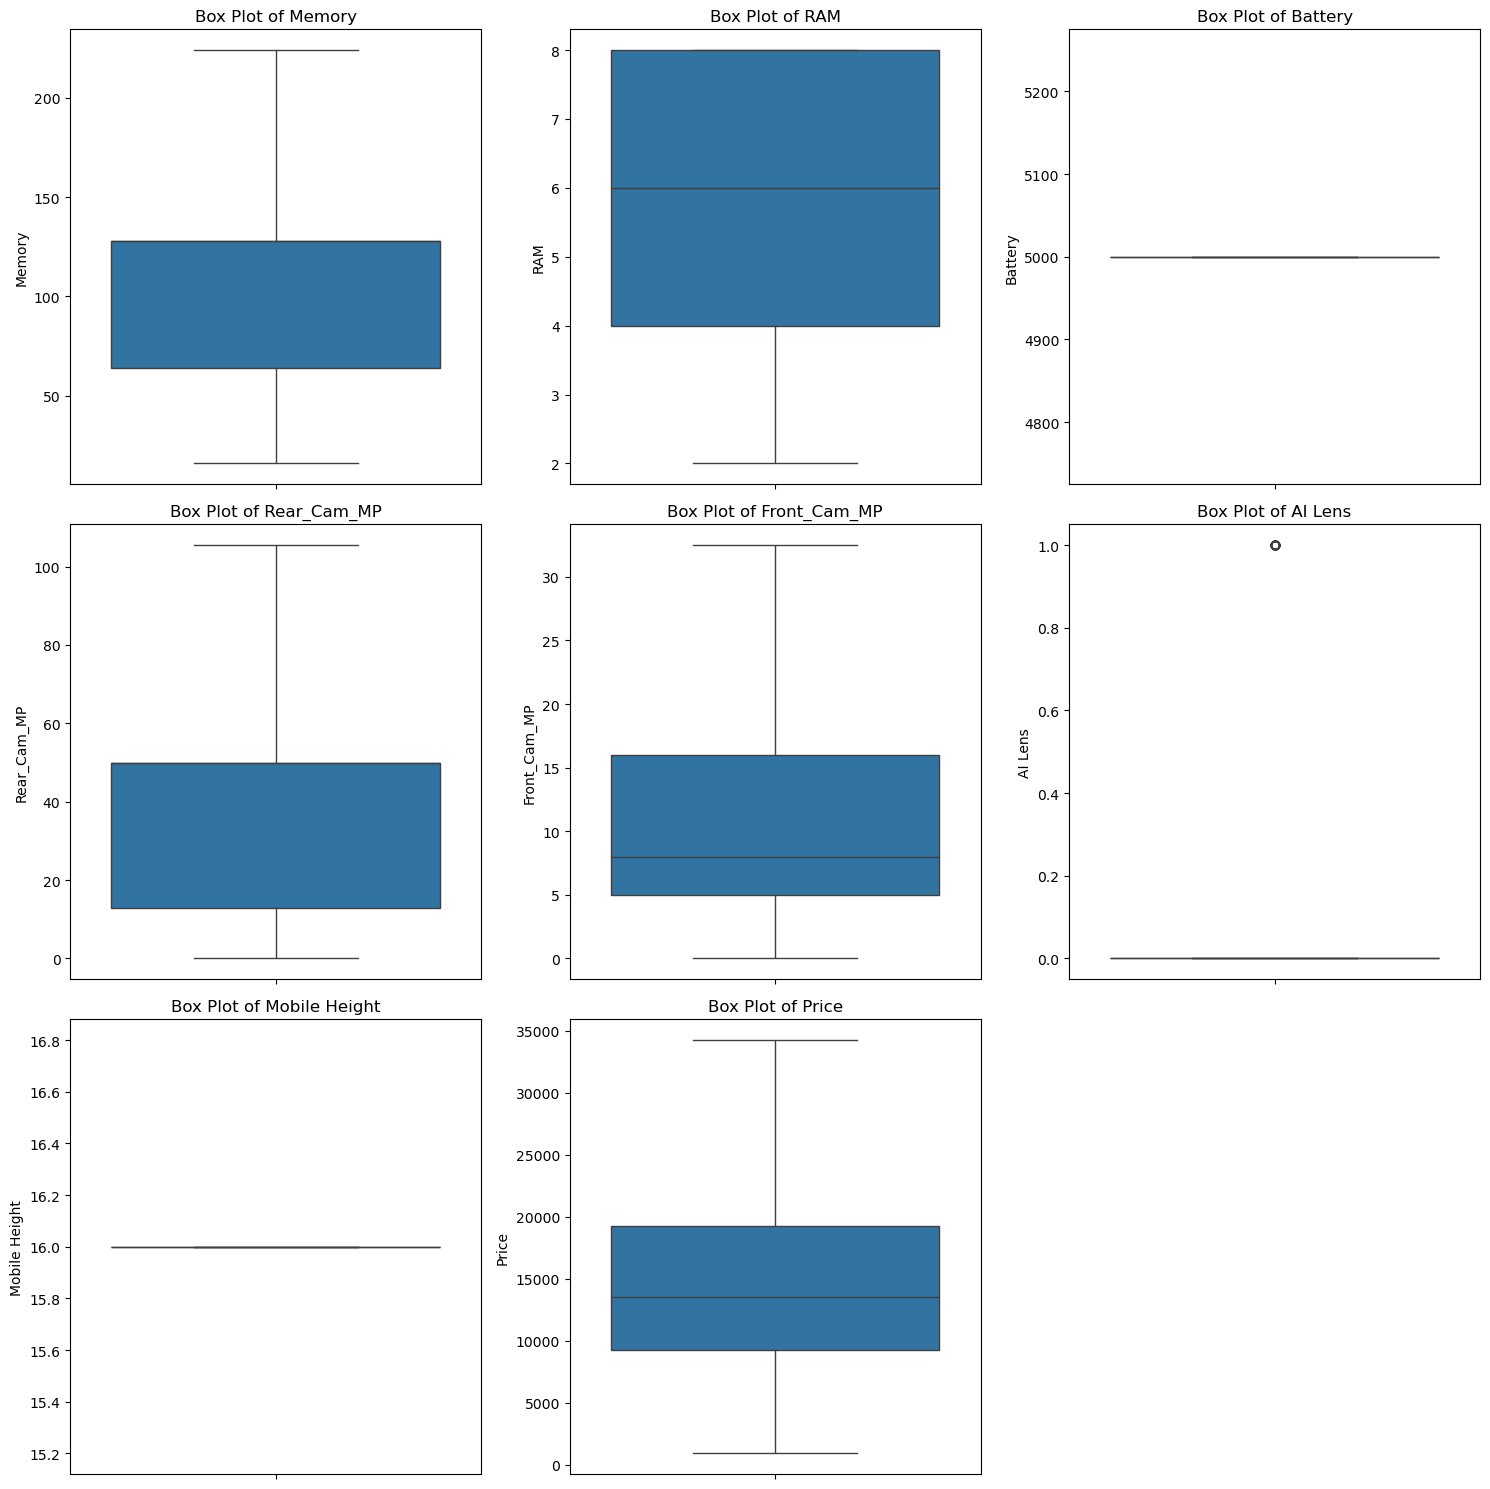

In [31]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

num_cols = len(numeric_cols)
rows = (num_cols // 3) + (num_cols % 3 > 0)  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, 5 * rows))
axes = axes.flatten()

# Generate boxplots
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f"Box Plot of {col}")

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


This visually confirms that all outliers are capped.

In [33]:
def categorize_model(model):
    if "Infinix" in model:
        return "Infinix"
    elif "OPPO" in model:
        return "oppo"
    elif "SAMSUNG" in model:
        return "SAMSUNG"
    elif "iPhone" in model:
        return "iPhone"
    elif "POCO" in model: 
        return "POCO"
    elif "MOTOROLA" in model:
        return "MOTOROLA"
    else:
        return "Others"

# Apply function to create new column
df["Model_Category"] = df["Model"].apply(categorize_model)

Here i added some new features to understand the data easily.

In [35]:
df

,Model,Colour,Memory,RAM,Battery,Rear_Cam_MP,Front_Cam_MP,AI Lens,Mobile Height,Processor_,Price,Model_Category
0,Infinix SMART 7,Night Black,64.0,4,5000.0,13.0,5.0,1,16.0,Unisoc Spreadtrum SC9863A1,7299.0,Infinix
1,Infinix SMART 7,Azure Blue,64.0,4,5000.0,13.0,5.0,1,16.0,Unisoc Spreadtrum SC9863A1,7299.0,Infinix
2,MOTOROLA G32,Mineral Gray,128.0,8,5000.0,50.0,16.0,0,16.0,Qualcomm Snapdragon 680,11999.0,MOTOROLA
3,POCO C50,Royal Blue,32.0,2,5000.0,8.0,5.0,0,16.0,Mediatek Helio A22,5649.0,POCO
4,Infinix HOT 30i,Marigold,128.0,8,5000.0,50.0,5.0,1,16.0,G37,8999.0,Infinix
...,...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,224.0,8,5000.0,50.0,12.0,0,16.0,Qualcomm Snapdragon 8 Gen 2,34265.0,SAMSUNG
537,LAVA Z21,Cyan,32.0,2,5000.0,5.0,2.0,0,16.0,Octa Core,5998.0,Others
538,Tecno Spark 8T,Turquoise Cyan,64.0,4,5000.0,50.0,8.0,0,16.0,MediaTek Helio G35,9990.0,Others
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128.0,8,5000.0,50.0,32.0,0,16.0,"Exynos 1380, Octa Core",34265.0,SAMSUNG


In [36]:
def categorize_colour(colour):
    colour = str(colour)  # Ensure colour is treated as a string
    if "Blue" in colour:
        return "Blue"
    elif "Black" in colour:
        return "Black"
    elif "Purple" in colour or "Violet" in colour:
        return "Purple"
    elif "Grey" in colour:
        return "Grey"
    else:
        return "others"

# Apply function to create new column
df["Colour_Category"] = df["Colour"].astype(str).apply(categorize_colour)

This is the another feature which i added to data to make it easy to understand. 

In [38]:
df

,Model,Colour,Memory,RAM,Battery,Rear_Cam_MP,Front_Cam_MP,AI Lens,Mobile Height,Processor_,Price,Model_Category,Colour_Category
0,Infinix SMART 7,Night Black,64.0,4,5000.0,13.0,5.0,1,16.0,Unisoc Spreadtrum SC9863A1,7299.0,Infinix,Black
1,Infinix SMART 7,Azure Blue,64.0,4,5000.0,13.0,5.0,1,16.0,Unisoc Spreadtrum SC9863A1,7299.0,Infinix,Blue
2,MOTOROLA G32,Mineral Gray,128.0,8,5000.0,50.0,16.0,0,16.0,Qualcomm Snapdragon 680,11999.0,MOTOROLA,others
3,POCO C50,Royal Blue,32.0,2,5000.0,8.0,5.0,0,16.0,Mediatek Helio A22,5649.0,POCO,Blue
4,Infinix HOT 30i,Marigold,128.0,8,5000.0,50.0,5.0,1,16.0,G37,8999.0,Infinix,others
...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,224.0,8,5000.0,50.0,12.0,0,16.0,Qualcomm Snapdragon 8 Gen 2,34265.0,SAMSUNG,others
537,LAVA Z21,Cyan,32.0,2,5000.0,5.0,2.0,0,16.0,Octa Core,5998.0,Others,others
538,Tecno Spark 8T,Turquoise Cyan,64.0,4,5000.0,50.0,8.0,0,16.0,MediaTek Helio G35,9990.0,Others,others
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128.0,8,5000.0,50.0,32.0,0,16.0,"Exynos 1380, Octa Core",34265.0,SAMSUNG,others


In [39]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding
df["Colour_Category_Num"] = le.fit_transform(df["Colour_Category"])

# Display unique values mapping
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Black': 0, 'Blue': 1, 'Grey': 2, 'Purple': 3, 'others': 4}


In [40]:
df

,Model,Colour,Memory,RAM,Battery,Rear_Cam_MP,Front_Cam_MP,AI Lens,Mobile Height,Processor_,Price,Model_Category,Colour_Category,Colour_Category_Num
0,Infinix SMART 7,Night Black,64.0,4,5000.0,13.0,5.0,1,16.0,Unisoc Spreadtrum SC9863A1,7299.0,Infinix,Black,0
1,Infinix SMART 7,Azure Blue,64.0,4,5000.0,13.0,5.0,1,16.0,Unisoc Spreadtrum SC9863A1,7299.0,Infinix,Blue,1
2,MOTOROLA G32,Mineral Gray,128.0,8,5000.0,50.0,16.0,0,16.0,Qualcomm Snapdragon 680,11999.0,MOTOROLA,others,4
3,POCO C50,Royal Blue,32.0,2,5000.0,8.0,5.0,0,16.0,Mediatek Helio A22,5649.0,POCO,Blue,1
4,Infinix HOT 30i,Marigold,128.0,8,5000.0,50.0,5.0,1,16.0,G37,8999.0,Infinix,others,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,224.0,8,5000.0,50.0,12.0,0,16.0,Qualcomm Snapdragon 8 Gen 2,34265.0,SAMSUNG,others,4
537,LAVA Z21,Cyan,32.0,2,5000.0,5.0,2.0,0,16.0,Octa Core,5998.0,Others,others,4
538,Tecno Spark 8T,Turquoise Cyan,64.0,4,5000.0,50.0,8.0,0,16.0,MediaTek Helio G35,9990.0,Others,others,4
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128.0,8,5000.0,50.0,32.0,0,16.0,"Exynos 1380, Octa Core",34265.0,SAMSUNG,others,4


Now i do some visualizations.

# Visualizations

# Histogram

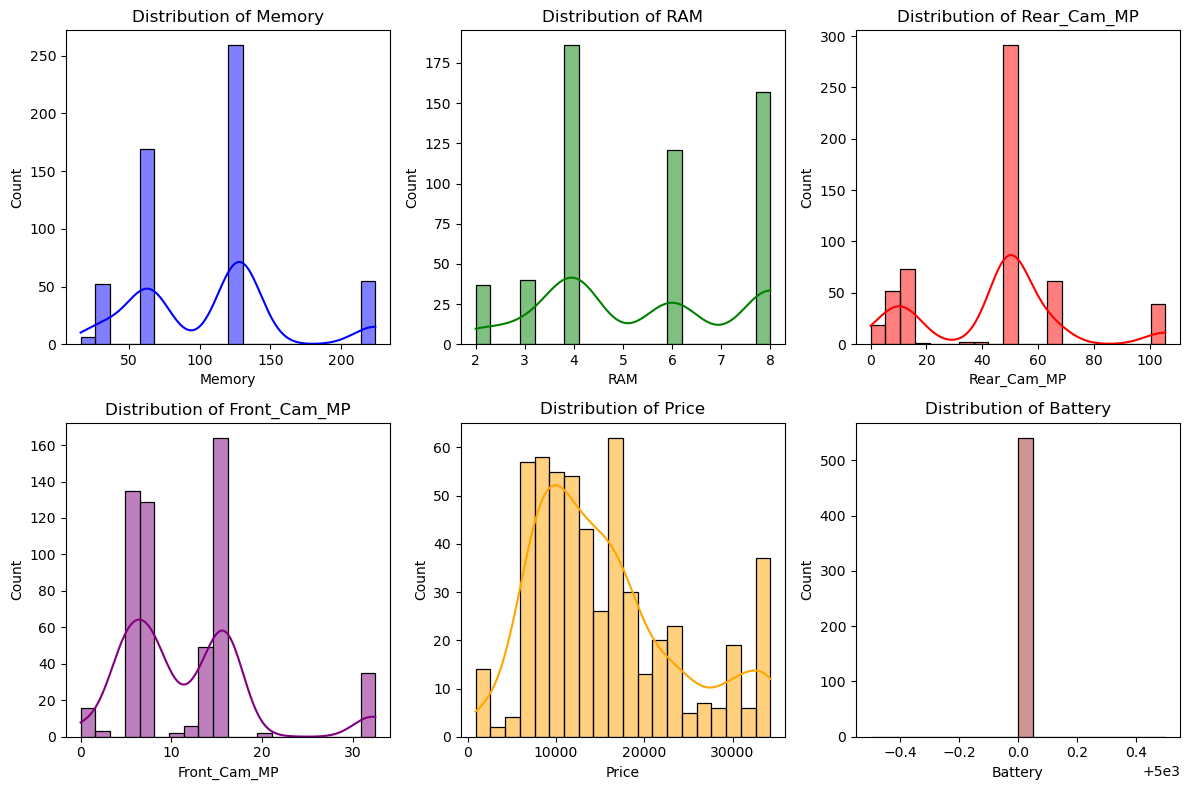

In [44]:
numeric_columns = ["Memory", "RAM","Rear_Cam_MP", "Front_Cam_MP", "Price","Battery"]

# Set up the plot
plt.figure(figsize=(12, 8))
colors = ["blue", "green", "red", "purple", "orange", "brown"]

# Generate histograms
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, color=colors[i-1], bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


1).Memory, RAM, and Battery:
Likely right-skewed, indicating a higher concentration of lower values and fewer high-end devices with large memory, RAM, or battery capacity.

2).Rear_Cam_MP & Front_Cam_MP:
Possible bimodal distribution, meaning two popular camera resolution categories exist (e.g., 12-13 MP and 48-50 MP).
Highlights clear segmentation between budget and premium phones.

3).Price Distribution:
Likely right-skewed, meaning most phones are in the lower price range, with fewer expensive models.

# Scatter Plot

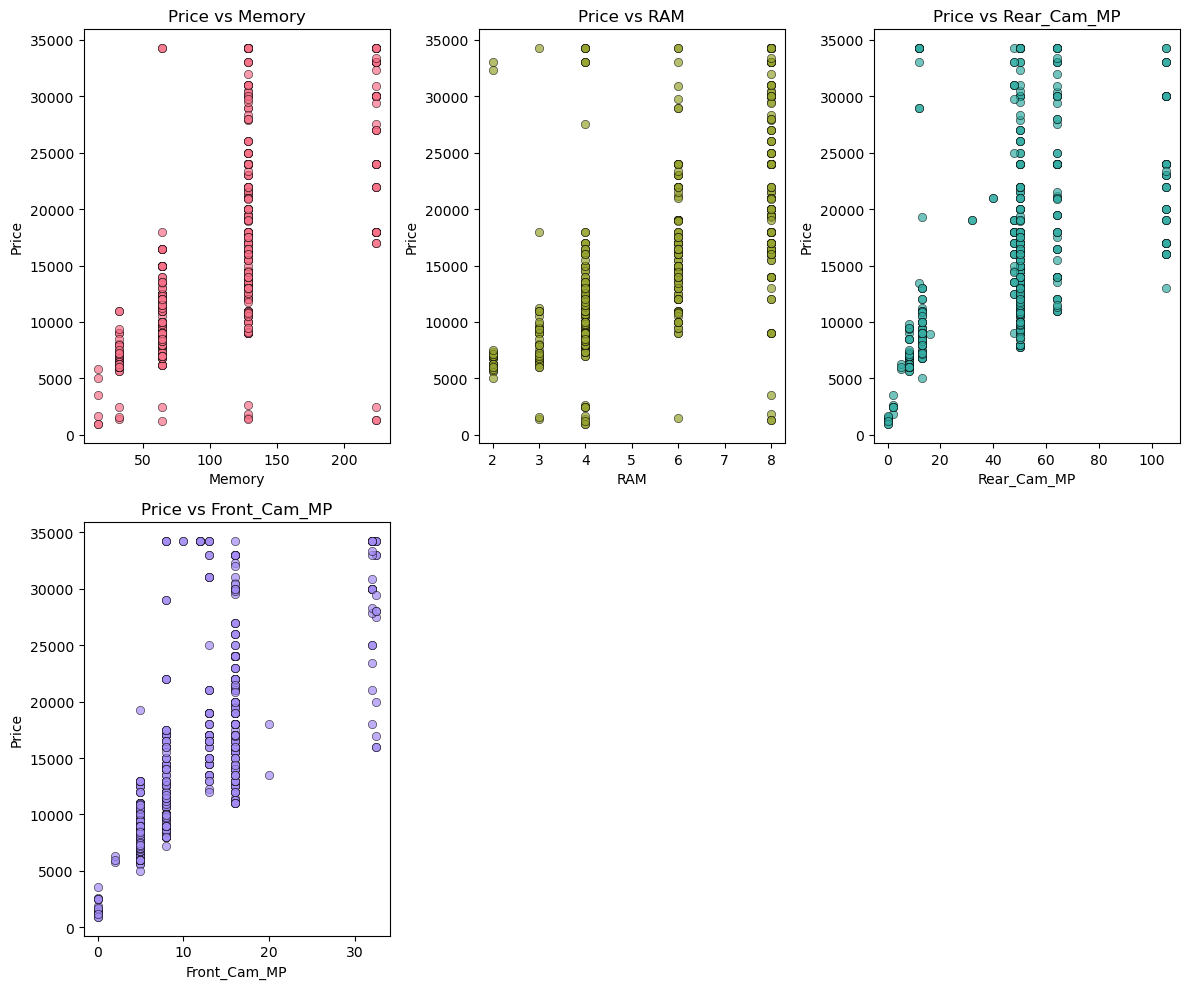

In [47]:
# Convert column names to consistent format (remove spaces, special characters)
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('.', '')

# Select numeric columns for scatter plots
numeric_columns = ['Memory', 'RAM','Rear_Cam_MP', 'Front_Cam_MP', 'Price']

# Set color palette
colors = sns.color_palette("husl", len(numeric_columns) - 1)

# Create scatter plots
plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_columns[:-1]):  # Exclude 'Price' itself
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=df[col], y=df['Price'], color=colors[i], alpha=0.7, edgecolor="black")
    plt.title(f'Price vs {col}')
    plt.xlabel(col)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

1).Memory & RAM vs Price:
Positive correlation: As Memory and RAM increase, the price also tends to rise.
This suggests that these features significantly influence pricing, especially in mid-to-premium smartphones.

2).Rear_Cam_MP & Front_Cam_MP vs Price:
Weak to moderate correlation: Higher camera megapixels generally correspond to higher prices, but some budget phones also have high MP cameras.
This indicates that camera quality alone isn't the sole factor driving price—other aspects like brand, processor, and AI features may play a role.

# Bar chart

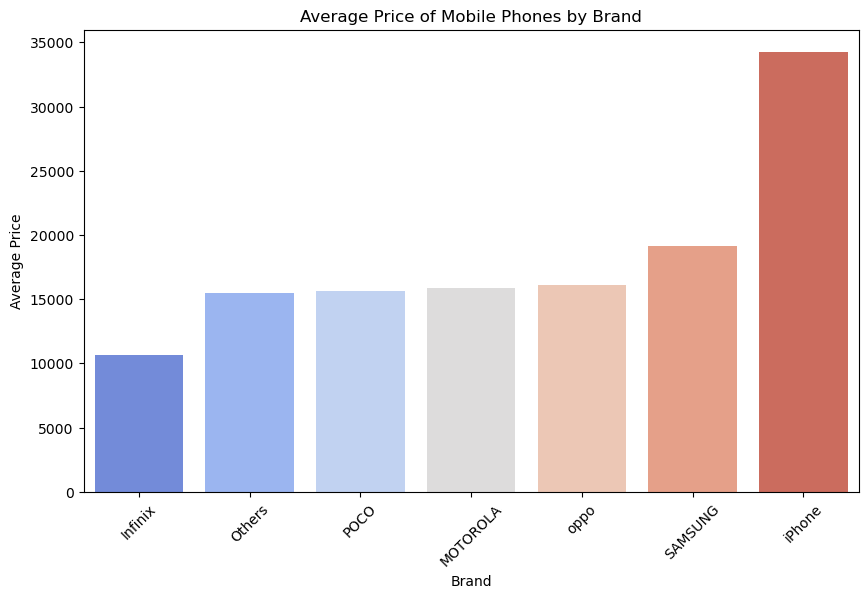

In [50]:
plt.figure(figsize=(10, 6))
brand_avg_price = df.groupby("Model_Category")["Price"].mean().sort_values()
sns.barplot(x=brand_avg_price.index, y=brand_avg_price.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Average Price of Mobile Phones by Brand")
plt.xlabel("Brand")
plt.ylabel("Average Price")
plt.show()


The plot will reveal the average price variation across mobile phone brands, helping us to identify which brands target premium or budget segments. Taller bars represent higher average prices, while shorter ones suggest affordability. It’s a quick way to compare brand positioning and market strategy.

# Count Plot

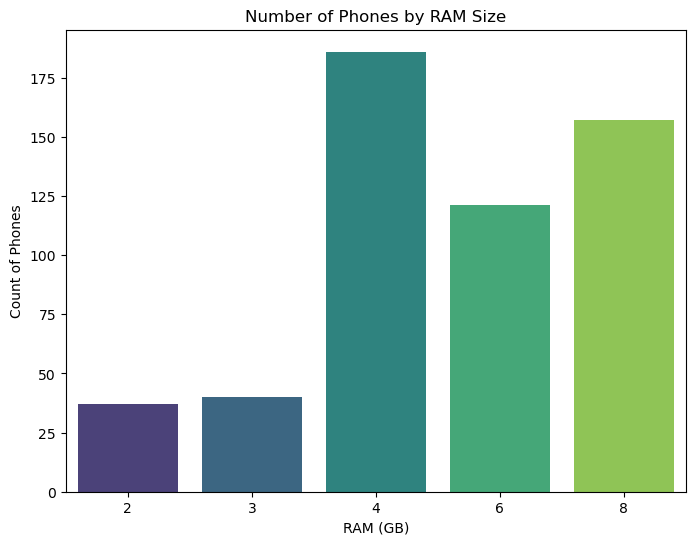

In [52]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df["RAM"], palette="viridis")
plt.title("Number of Phones by RAM Size")
plt.xlabel("RAM (GB)")
plt.ylabel("Count of Phones")
plt.show()

The plot will highlight the distribution of phones by RAM size, showing which RAM configurations are most common. Taller bars represent RAM sizes with higher counts, indicating their popularity among available models. This helps identify trends and preferences in RAM offerings within the dataset.

# Pie Chart

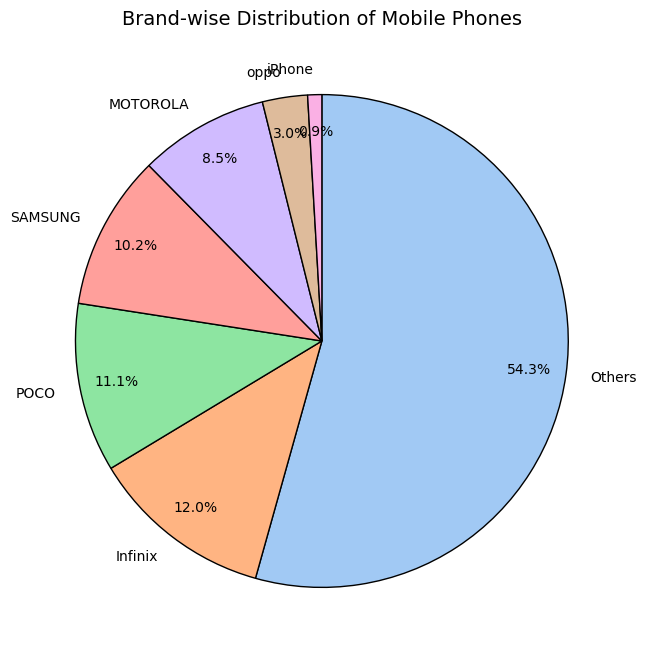

In [55]:
# Function to plot Model Category Pie Chart
def plot_model_category_pie():
    plt.figure(figsize=(8, 8)) 
    data = df["Model_Category"].value_counts()

    # If too many categories, group smaller ones as "Others"
    if len(data) > 7:  
        top_values = data[:6]  
        other_values = data[6:].sum()
        data = top_values.append(pd.Series({"Others": other_values}))

    # Generate the pie chart
    wedges, texts, autotexts = plt.pie(
        data, labels=data.index, autopct='%1.1f%%', 
        colors=sns.color_palette("pastel"),
        startangle=90, counterclock=False,  # Adjusts layout
        wedgeprops={'linewidth': 1, 'edgecolor': 'black'},  
        pctdistance=0.85  # Moves percentage labels inside slices
    )

    # Adjust label size for better visibility
    for text in texts + autotexts:
        text.set_fontsize(10)

    plt.title("Brand-wise Distribution of Mobile Phones", fontsize=14)
    plt.show()

# Call the function
plot_model_category_pie()

The pie chart generated by this function will display the distribution of mobile phones across different model categories (or brands). Here's what it accomplishes:

Segmentation Overview: It highlights how the dataset is divided among various model categories, with larger slices indicating more prominent categories.

Condensed Visualization: If there are many categories, smaller ones are grouped as "Others" to maintain clarity and focus on major contributors.

Percentage Representation: The autopct parameter ensures that each slice shows its percentage, making it easy to compare the shares of each category visually.

# Feature Extraction:

# Correlation Heatmap:

In [59]:
print(df[['Battery', 'Mobile_Height']].dtypes)
# Convert specific columns to integer data type
df['Battery'] = pd.to_numeric(df['Battery'], errors='coerce').astype(int)
df['Mobile_Height'] = pd.to_numeric(df['Mobile_Height'], errors='coerce').astype(int)

Battery          float64
Mobile_Height    float64
dtype: object


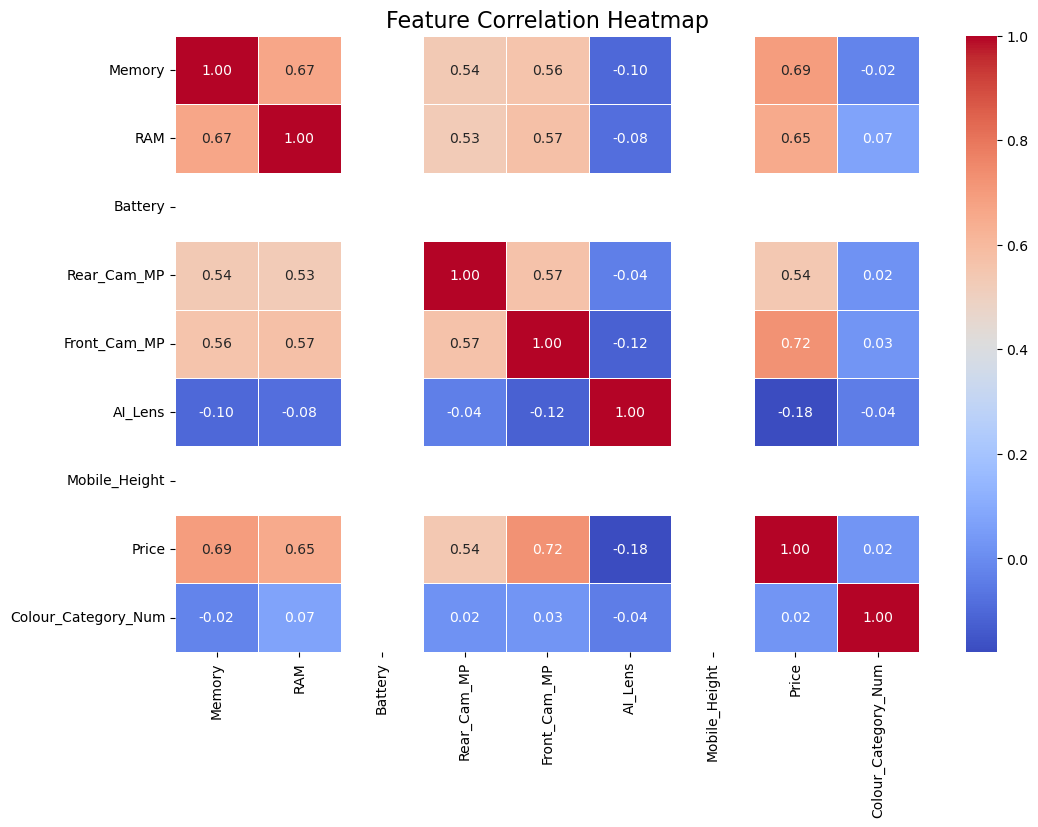

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for numeric columns
numeric_columns = df.select_dtypes(include=['number']) 
correlation_matrix = numeric_columns.corr()

# Generate the heatmap
plt.figure(figsize=(12, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add a title for clarity
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

The heatmap reveals relationships between numerical features in the dataset. Strong correlations (values closer to 1 or -1) indicate dependencies, such as higher RAM or storage potentially driving up prices. Weak or near-zero correlations highlight features with minimal influence on each other. Insights like these can guide further analysis or business decisions.

# Prncipal component Analysis(PCA)

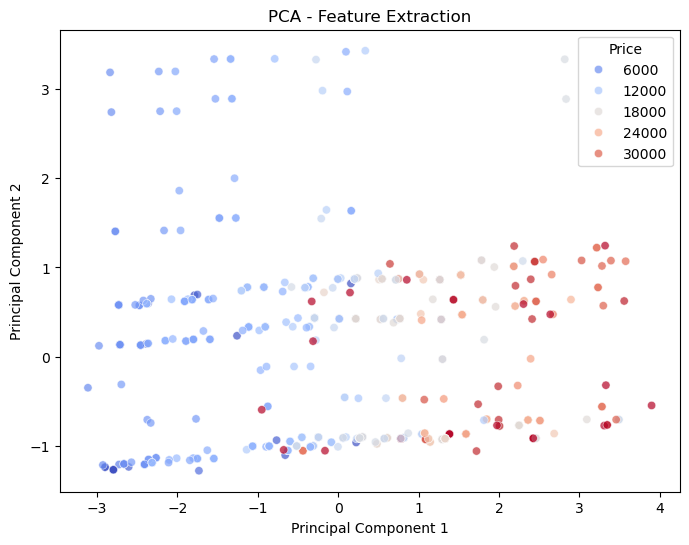

In [63]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
numeric_df = df.select_dtypes(include=['number'])
# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df.drop("Price", axis=1))

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_pca = pca.fit_transform(X_scaled)

# Convert to DataFrame
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["Price"] = df["Price"]

# Visualize PCA results
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_df["PC1"], y=pca_df["PC2"], hue=pca_df["Price"], palette="coolwarm", alpha=0.7)
plt.title("PCA - Feature Extraction")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


The PCA scatter plot reveals how the dataset's features combine into two principal components (PC1 and PC2), capturing the most significant variations. The color gradient, influenced by Price, highlights how phones in similar price ranges cluster together or spread across the component space. If distinct groupings emerge, it may indicate similarities in features within certain price segments. Outliers or overlapping clusters can offer insights into diverse specifications within similar pricing.

# SelectKBest

In [66]:
from sklearn.feature_selection import SelectKBest, f_regression
X = df.drop("Price", axis=1)  # Replace "Price" with your target column name
y = df["Price"]  # Target column

X = X.select_dtypes(include=['number'])

# Select top 5 features
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X, y)

# Show selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features.tolist())
print(X.shape, y.shape)


Selected Features: ['Memory', 'RAM', 'Rear_Cam_MP', 'Front_Cam_MP', 'AI_Lens']
(541, 8) (541,)


The SelectKBest process identified the top five features most relevant to predicting the Price of mobile phones, based on their relationship using the f_regression scoring method. This feature selection eliminates less relevant columns, simplifying the model and enhancing its efficiency. The selected features contribute significantly to price variance, likely including attributes like RAM, battery capacity, or camera specifications. These features provide the strongest predictive power for price estimation. By focusing on these, we can reduce noise in the data and improve model performance.

# Model Building

# Train & Testing data

In [70]:
from sklearn.model_selection import train_test_split
numeric_df = df.select_dtypes(include=['number'])
# Define target (Price) and features
X = numeric_df.drop("Price", axis=1)  # Features
y = numeric_df["Price"]  # Target variable

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Samples: {X_train.shape[0]}, Testing Samples: {X_test.shape[0]}")


Training Samples: 432, Testing Samples: 109


The given code divides the dataset into training (80%) and testing (20%) samples for building and evaluating machine learning models. The numeric_df ensures only numerical columns are used for feature selection (X) and the target variable (y) is Price. This split ensures sufficient data for model training and validation, enabling robust analysis. The random_state=42 ensures reproducibility, meaning the same split will occur every time the code runs. Insights from this process can be used to identify how features like RAM, battery, and camera specifications influence mobile phone pricing.

# Random Forest Regressor

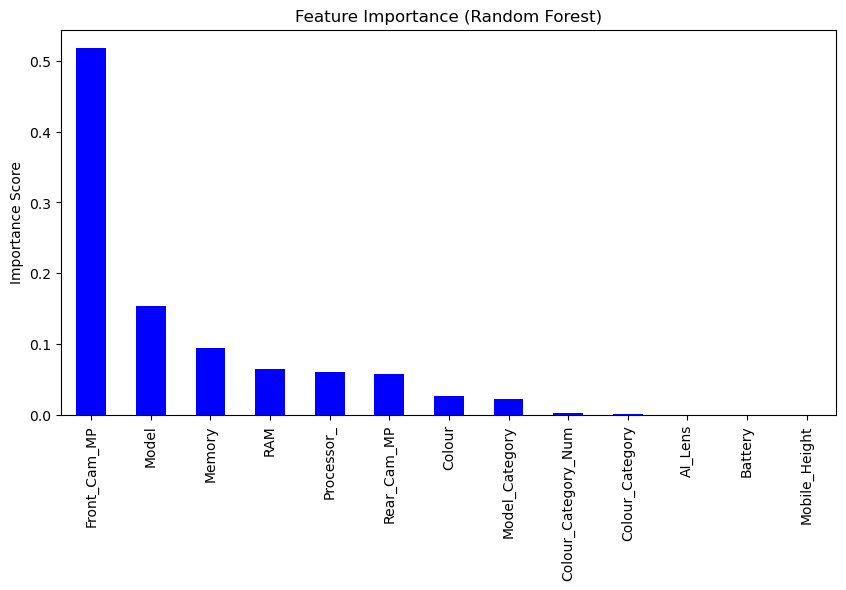

In [73]:
# Encode categorical columns using LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
categorical_cols = df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
X = df.drop("Price", axis=1)
y = df["Price"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance scores
import matplotlib.pyplot as plt
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind="bar", figsize=(10, 5), color="blue")
plt.title("Feature Importance (Random Forest)")
plt.ylabel("Importance Score")
plt.show()


The Random Forest model identifies the most influential features contributing to mobile phone pricing. The bar chart of feature importance highlights which factors, such as RAM, memory, or specific categorical features (e.g., brand, color), strongly impact the price. Features with higher importance scores play a larger role in determining pricing, offering insights for optimization or predictive modeling. This analysis helps prioritize key variables for further study and simplifies complex datasets by focusing on critical elements.

# Mutual Information

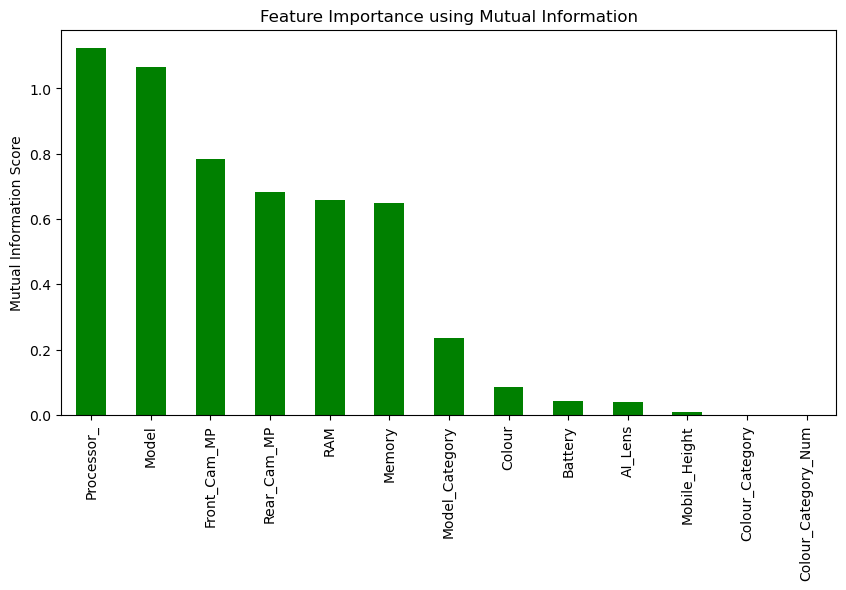

In [76]:
from sklearn.feature_selection import mutual_info_regression

# Compute Mutual Information scores
mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns)

# Plot scores
mi_scores.sort_values(ascending=False).plot(kind="bar", figsize=(10,5), color="green")
plt.title("Feature Importance using Mutual Information")
plt.ylabel("Mutual Information Score")
plt.show()


This code computes Mutual Information (MI) scores to evaluate the relationship between features (X) and the target variable (y, Price). The MI score measures how much information a feature provides about the target, identifying features with a non-linear dependency on the target.

Insights:
Features with higher MI scores have a stronger relationship with Price, indicating they contribute more to predicting the target.

The bar chart visually ranks features by importance, helping to prioritize the most informative ones for modeling.

Unlike linear correlations, MI captures non-linear relationships, revealing hidden patterns between features and Price.

# Decision tree model

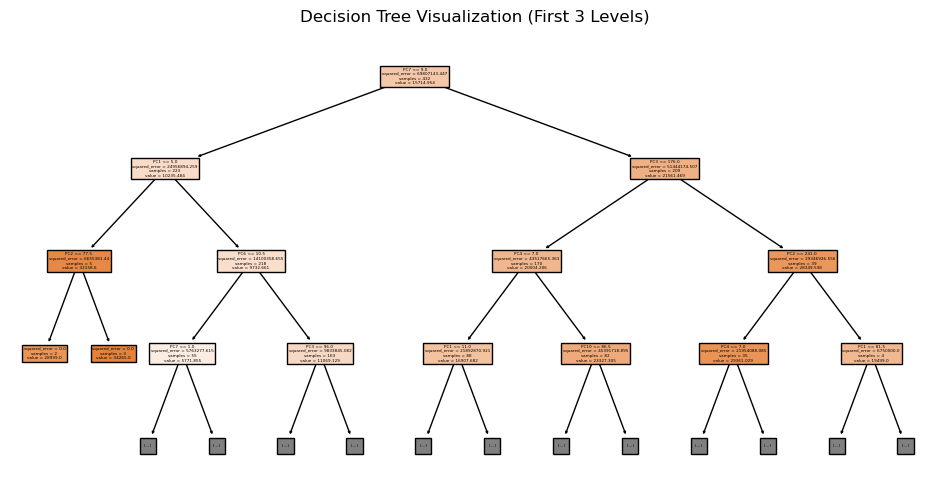

(0.887255483063071, 2565.262958425814)

In [79]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
# Train Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt_model.predict(X_test)

# Evaluate performance
r2_dt = r2_score(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

# Plot Decision Tree (only if it's small enough)
plt.figure(figsize=(12, 6))
plot_tree(dt_model, max_depth=3, feature_names=[f"PC{i+1}" for i in range(X_train.shape[1])], filled=True)
plt.title("Decision Tree Visualization (First 3 Levels)")
plt.show()

# Show performance metrics
r2_dt, rmse_dt


The Decision Tree plot provides insights into how features are used to predict Price. The topmost splits in the tree represent the most important features influencing pricing decisions, as they divide the data early. Each node shows a condition, splitting data into subsets with similar price ranges. The leaf nodes display the final predicted prices and the sample size for those predictions. The hierarchical structure aids in understanding how combinations of features contribute to price differentiation. Limiting the depth to three levels ensures clarity while retaining interpretability.

# Gradient Boosting Regressor

In [82]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
r2_gb = r2_score(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))

print(f"Gradient Boosting R²: {r2_gb:.4f}, RMSE: {rmse_gb:.2f}")


Gradient Boosting R²: 0.9133, RMSE: 2250.11


This code implements and evaluates a Gradient Boosting Regressor for predicting Price. Here's a breakdown:

Model Training: The GradientBoostingRegressor is trained on X_train and y_train with 100 estimators, a learning rate of 0.1, and a maximum tree depth of 5. These parameters balance model complexity and learning speed.

Predictions: It predicts Price for the X_test dataset, stored in y_pred_gb.

Performance Evaluation: The R² score (r2_gb) indicates the proportion of variance in Price explained by the model. RMSE (rmse_gb) measures the average prediction error in the same units as Price.

The results provide a clear picture of model accuracy and error magnitude.

# Support Vector Machine (SVM)

In [85]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM regressor
svr = SVR(kernel='rbf', C=1.0, epsilon=0.2)  # RBF kernel for non-linear regression
svr.fit(X_train, y_train)

# Make predictions
y_pred_svr = svr.predict(X_test)

# Evaluate performance
r2 = r2_score(y_test, y_pred_svr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr))

print(f"SVM Regression R²: {r2:.2f}")
print(f"SVM Regression RMSE: {rmse:.2f}")


SVM Regression R²: -0.01
SVM Regression RMSE: 7667.23


R² Score Insight: The R² value quantifies how well the model explains the variance in the target variable. A higher R² (closer to 1) indicates better performance.

RMSE Analysis: RMSE measures prediction error in the same units as the target variable. A lower RMSE value reflects better accuracy.

Kernel Effectiveness: The RBF kernel works well for capturing non-linear relationships between features and the target variable, making it suitable for complex datasets.

Scope for Improvement: If the R² is low or RMSE is high, hyperparameter tuning (e.g., C, epsilon, or kernel) or additional feature engineering may improve performance.

# KNN Regression

In [88]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)  # You can adjust n_neighbors
knn_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn_reg.predict(X_test)
r2_knn = r2_score(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))

# Results
print(f"KNN Regression R²: {r2_knn:.2f}")
print(f"KNN Regression RMSE: {rmse_knn:.2f}")


KNN Regression R²: 0.66
KNN Regression RMSE: 4456.67


KNN Regression: A high R² score indicates how well the model explains variance, while a low RMSE reflects accurate predictions with minimal error.

KNN Classification: Higher accuracy suggests the model effectively classifies data, based on proximity between neighbors.

Parameter Sensitivity: Tuning n_neighbors and ensuring standardized features are key to optimizing KNN performance.

Suitability: KNN works best with smaller datasets and requires careful scaling of features for reliable results.

# Linear Regression

In [91]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"Linear Regression R²: {r2_lr:.4f}, RMSE: {rmse_lr:.2f}")


Linear Regression R²: 0.7418, RMSE: 3882.05


R² Score Insight: A high R² value means the model explains a large portion of the variance in the target variable. A low value suggests the need for more complex models or additional features.

RMSE Analysis: Lower RMSE indicates better predictions. If RMSE is high, predictions deviate significantly from the actual values.

Model Fit: Poor metrics may indicate that the linear assumption is insufficient, and non-linear models like Decision Trees or Gradient Boosting may perform better.

Feature Review: Issues like multicollinearity or missing relevant features could impact the model's performance, so further analysis might be needed.

# Feature Importance Analysis

# Mutual Information Scores (Non-linear relationships)

In [95]:
from sklearn.feature_selection import mutual_info_regression
mi_scores = mutual_info_regression(X_train, y_train)
mi_df = pd.DataFrame({'Feature': X_train.columns, 'MI Score': mi_scores})
mi_df.sort_values(by="MI Score", ascending=False, inplace=True)
print(mi_df)


                Feature  MI Score
9            Processor_  0.917047
0                 Model  0.849777
6          Front_Cam_MP  0.742944
5           Rear_Cam_MP  0.701964
3                   RAM  0.700835
2                Memory  0.693076
10       Model_Category  0.177588
7               AI_Lens  0.069659
1                Colour  0.047500
4               Battery  0.033559
8         Mobile_Height  0.000000
11      Colour_Category  0.000000
12  Colour_Category_Num  0.000000


Mutual Information (MI) scores reveal the strength of both linear and non-linear relationships between features and the target variable. Higher MI scores indicate features that contribute the most valuable information for predicting Price. These scores help prioritize important features, validate feature engineering efforts, and guide feature selection by highlighting those with meaningful associations. Features with low MI scores can often be excluded to improve model simplicity and performance.